$$
\textbf{Analyse Ressource Humaine de HumanForYou}
$$

$$
\textbf{Par Maram Guesmi }
$$

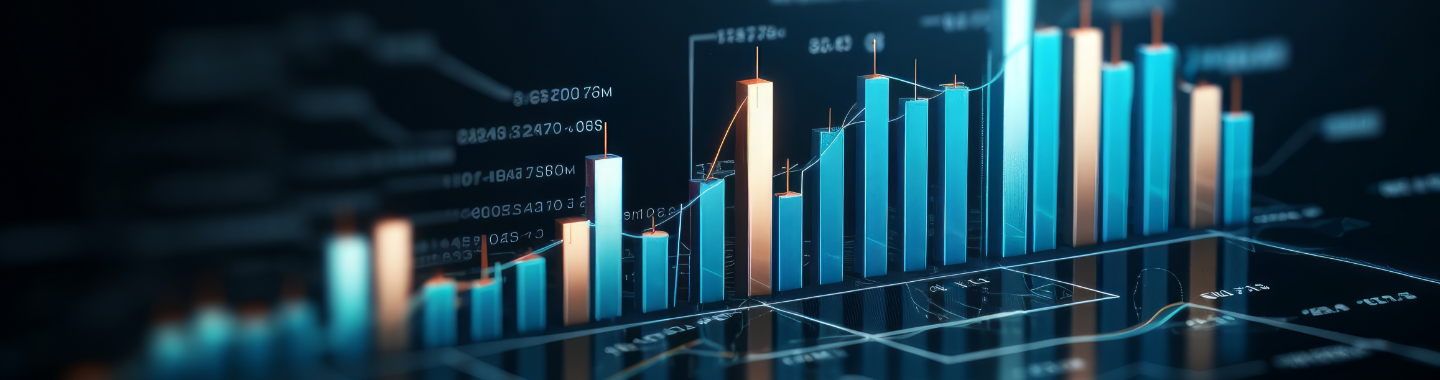

# **<span style="color:red">Importation des bibliothèques**



In [ ]:
import pandas as pd
import numpy as np


# **Traitement de `General Data`**


1. Observons les premières lignes de notre data frame `General Data`  avec la méthode [`head()`]

In [ ]:
datag = pd.read_csv('general_data.csv')
datag.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


 ***2*. Utilisons maintenant [`info()`]**

In [ ]:
datag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

***3*. Valeurs uniques dans chaque colonne**

In [ ]:
for col in datag.select_dtypes(include=['object']).columns:
    print(f"{col} unique values:")
    print(datag[col].value_counts(), "\n")


Attrition unique values:
Attrition
No     3699
Yes     711
Name: count, dtype: int64 

BusinessTravel unique values:
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64 

Department unique values:
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64 

EducationField unique values:
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64 

Gender unique values:
Gender
Male      2646
Female    1764
Name: count, dtype: int64 

JobRole unique values:
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240

**Over18** : Cette colonne contient uniquement la valeur Y pour tous les employés, elle n’apporte donc aucune information utile et peut être supprimée.

on va donc supprimer la colonne over18

In [ ]:
datag = datag.drop(['Over18'], axis=1)


**Suppression des Colonnes Non Informatives**

In [ ]:
datag = datag.drop(['StandardHours' ,'EmployeeCount'], axis=1, errors='ignore')


In [ ]:
datag.describe()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


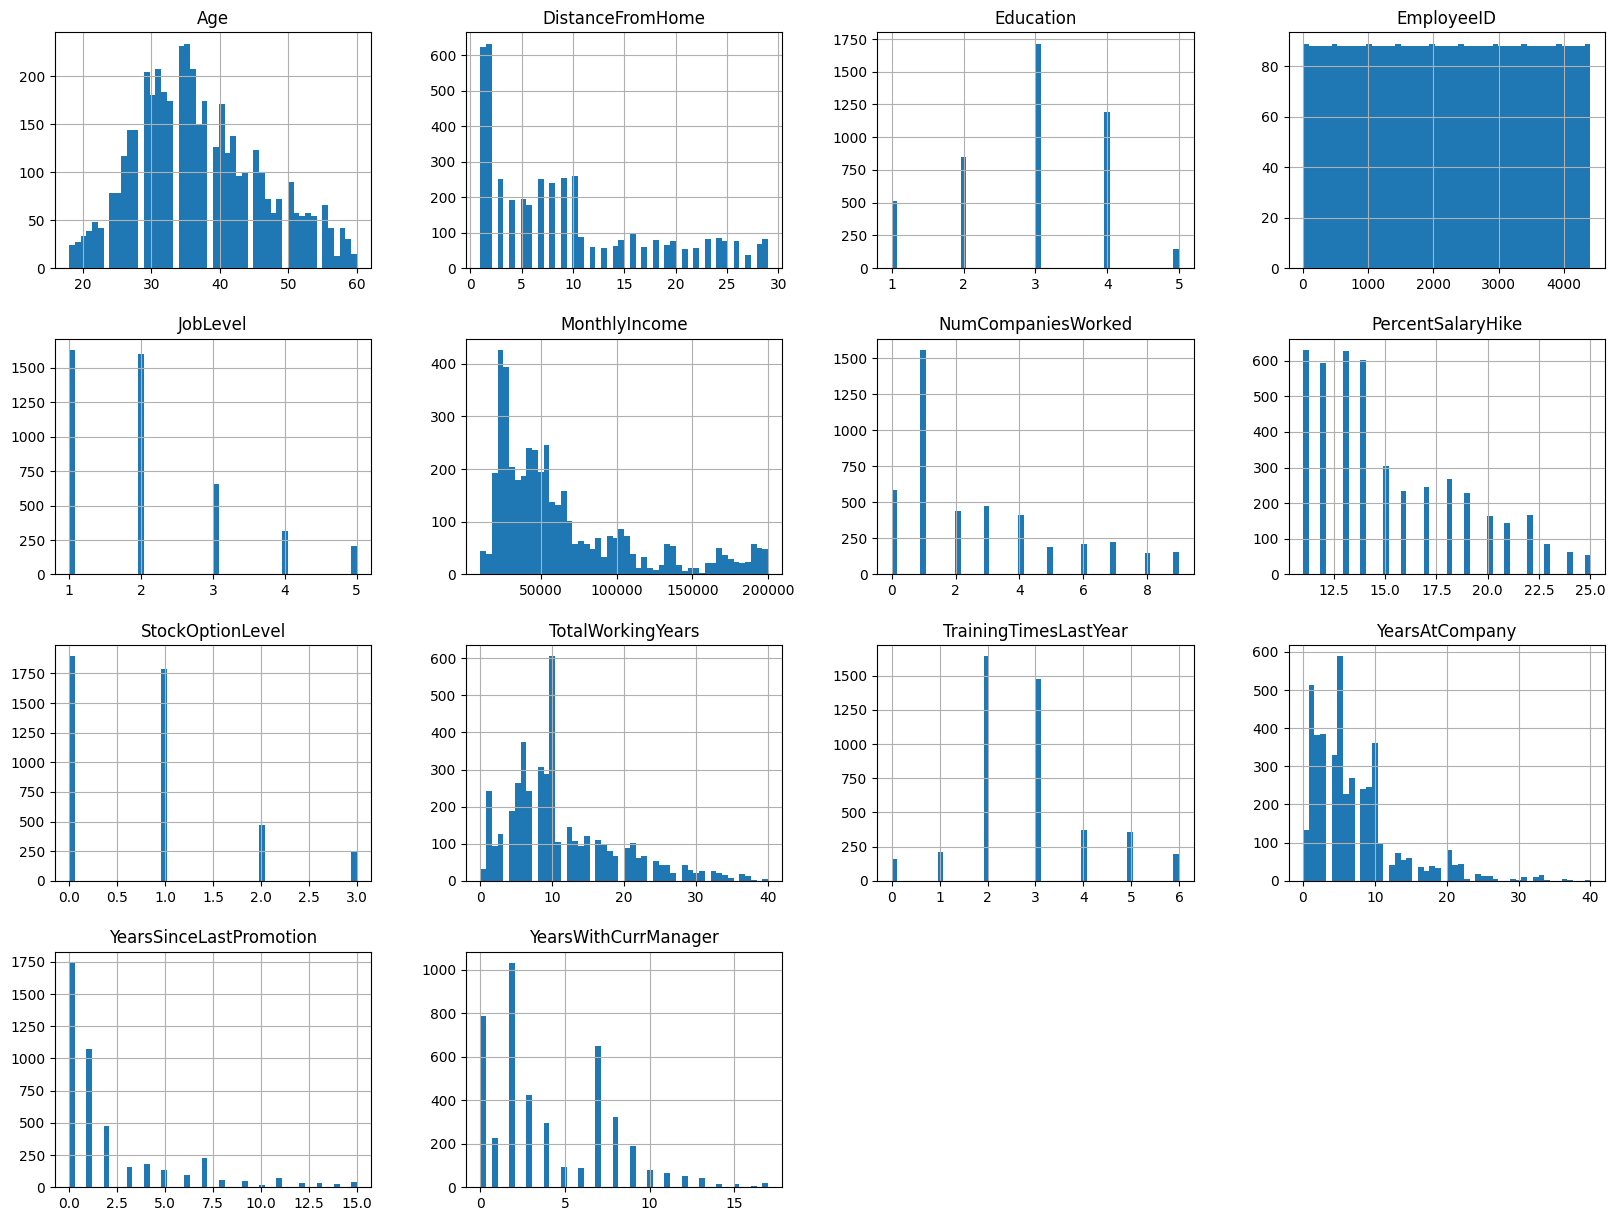

In [ ]:
import matplotlib.pyplot as plt
datag.hist(bins=50, figsize=(20,15))
plt.show()





* **Age:** La distribution de l'âge semble globalement normale, avec une concentration des employés dans la tranche d'âge 30-60 ans.
* **DistanceFromHome:** Une majorité des employés vivent à proximité de
leur lieu de travail.
* **JobLevel:** Distribution concentrée sur les niveaux d'emploi bas et moyen.
* **MonthlyIncome:** Distribution asymétrique positive, suggérant la présence de quelques employés avec un salaire élevé, mais une majorité se concentre sur les salaires moyens.
* **NumCompaniesWorked:** La majorité des employés ont travaillé dans un petit nombre d'entreprises auparavant.
* **PercentSalaryHike:**  La plupart des augmentations de salaire se situent entre 11% et 14%.
* **StockOptionLevel :** Distribution concentrée autour de niveaux bas d'options d'actions.
* **TotalWorkingYears:** Distribution globalement normale avec une légère asymétrie positive.
* **TrainingTimesLastYear:** La majorité des employés ont suivi entre 2 et 3 formations l'année dernière.
* **YearsAtCompany:**  Distribution asymétrique positive, indiquant que beaucoup d'employés ont une ancienneté relativement faible, mais certains ont une ancienneté importante.
* **YearsSinceLastPromotion:** La plupart des employés ont été promus récemment, ou n'ont pas eu de promotion depuis longtemps.
* **YearsWithCurrManager:**  Distribution similaire à YearsAtCompany, suggérant une certaine corrélation entre ces deux variables.



In [ ]:
# Check for missing values
print(datag.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [ ]:
# Example of removing rows with missing values:
datag = datag.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(datag.isnull().sum())


DataFrame after dropping rows with missing values:
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


**Encodage des Variables Catégorielles**

Les variables catégorielles nécessitent un encodage pour être exploitables par les modèles de machine learning.

Encodage Binaire pour Attrition (0 pour "No", 1 pour "Yes").
**Encodage One-Hot pour les autres variables catégorielles.**

In [ ]:
# Encodage binaire pour la colonne Attrition
datag['Attrition'] = datag['Attrition'].map({'Yes': 1, 'No': 0})

<ipython-input-12-bf91a4da5f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datag['Attrition'] = datag['Attrition'].map({'Yes': 1, 'No': 0})


**Convert 'BusinessTravel' to numerical values**

In [ ]:
datag['BusinessTravel'] = datag['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2 })

<ipython-input-13-bc854476a956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datag['BusinessTravel'] = datag['BusinessTravel'].map({


**Convert 'Gender' from categorical ('Female', 'Male') to numerical (0, 1)**

In [ ]:
datag['Gender'] = datag['Gender'].map({'Female': 0, 'Male': 1})

<ipython-input-14-00af9434a313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datag['Gender'] = datag['Gender'].map({'Female': 0, 'Male': 1})


In [ ]:
datag.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,Sales,6,2,Life Sciences,1,0,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,Research & Development,10,1,Life Sciences,2,0,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,Research & Development,17,4,Other,3,1,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,Research & Development,2,5,Life Sciences,4,1,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,Research & Development,10,1,Medical,5,1,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


# **Traitement de `manager_survey_data`**

In [ ]:
mdata = pd.read_csv('manager_survey_data.csv')
mdata.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


**Vérification des valeurs manquantes**





In [ ]:
mdata.isnull().sum()

,0
EmployeeID,0
JobInvolvement,0
PerformanceRating,0


**Vérification des doublons dans EmployeeID**

In [ ]:
mdata['EmployeeID'].duplicated().sum()

0

In [ ]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


# **Traitement de `employee_survey_data`**

**Vérification des types de données**

In [ ]:
ep= pd.read_csv('employee_survey_data.csv')
ep.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


**Vérification des types de données**

In [ ]:
ep.dtypes

,0
EmployeeID,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64


**Vérification des valeurs manquantes**

In [ ]:
ep.isnull().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


**Gestion des Valeurs Manquantes**

**EnvironmentSatisfaction**

In [ ]:
env = ep.groupby('EnvironmentSatisfaction')['EnvironmentSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
print("\nStatistiques par EnvironmentSatisfaction :")
print(env)



Statistiques par EnvironmentSatisfaction :
                         count  mean  median  min  max
EnvironmentSatisfaction                               
1.0                        845   1.0     1.0  1.0  1.0
2.0                        856   2.0     2.0  2.0  2.0
3.0                       1350   3.0     3.0  3.0  3.0
4.0                       1334   4.0     4.0  4.0  4.0


*J'ai constaté que la valeur médiane pour la satisfaction de l'environnement de travail dans toutes les catégories est de 3. Cela suggère qu'il serait approprié d'imputer les valeurs manquantes avec cette médiane.*

In [ ]:
ep["EnvironmentSatisfaction"] = ep["EnvironmentSatisfaction"].fillna(ep["EnvironmentSatisfaction"].median()).astype(int)

**JobSatisfaction**

In [ ]:
Job = ep.groupby('JobSatisfaction')['EnvironmentSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
print("Statistiques par JobSatisfaction :")
print(Job)

Statistiques par JobSatisfaction :
                 count      mean  median  min  max
JobSatisfaction                                   
1.0                860  2.746512     3.0    1    4
2.0                840  2.766667     3.0    1    4
3.0               1323  2.655329     3.0    1    4
4.0               1367  2.754206     3.0    1    4


*En analysant les statistiques de la satisfaction au travail, nous avons observés que la médiane est également égale à 3 dans toutes les catégories. Cela indique que l'imputation des valeurs manquantes avec cette médiane serait une bonne approche, car elle reflète le niveau de satisfaction central pour cette variable.*

In [ ]:
ep["JobSatisfaction"] = ep["JobSatisfaction"].fillna(ep["JobSatisfaction"].median()).astype(int)

**WorkLifeBalance**

In [ ]:
Wk = ep.groupby('WorkLifeBalance')['EnvironmentSatisfaction'].agg(['count', 'mean', 'median', 'min', 'max'])
print("Statistiques par WorkLifeBalance :")
print(Wk)

Statistiques par WorkLifeBalance :
                 count      mean  median  min  max
WorkLifeBalance                                   
1.0                239  2.661088     3.0    1    4
2.0               1019  2.680079     3.0    1    4
3.0               2660  2.748120     3.0    1    4
4.0                454  2.733480     3.0    1    4


*Pour l'équilibre travail-vie personnelle, la médiane est également de 3 pour toutes les catégories. Cette valeur centrale suggère que l'imputation des valeurs manquantes avec la médiane de 3 serait appropriée pour maintenir la cohérence des données et éviter toute distorsion.*

In [ ]:
ep["WorkLifeBalance"] = ep["WorkLifeBalance"].fillna(ep["WorkLifeBalance"].median()).astype(int)

In [ ]:
ep.isnull().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,0
JobSatisfaction,0
WorkLifeBalance,0


**Vérification des doublons dans EmployeeID**

In [ ]:
ep['EmployeeID'].duplicated().sum()

0

In [ ]:
ep.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.725170,2.729478,2.763492
std,1273.201673,1.089852,1.098904,0.703541
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


# In_Out_Time

# **Traitement de `in_time`**

In [ ]:
in_time = pd.read_csv('in_time.csv', engine='python', on_bad_lines='skip')
in_time.head(2)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


In [ ]:
in_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
in_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [ ]:
in_time.duplicated().sum()

0

In [ ]:
print(in_time.isnull().sum())

EmployeeID       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64



**Gestion des Valeurs Manquantes**

In [ ]:
for col in in_time.columns[1:]:
    # Convertir en datetime, gérer les erreurs en mettant NaT
    in_time[col] = pd.to_datetime(in_time[col], errors='coerce')
    # Extraire le temps et convertir en secondes, en gérant les NaT
    in_time[col] = in_time[col].dt.time.apply(
        lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notnull(x) else None
    )
    # S'assurer que la colonne est de type numérique
    in_time[col] = pd.to_numeric(in_time[col])


In [ ]:
# Appliquer une interpolation linéaire pour combler les valeurs manquantes
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].interpolate(method='linear', limit_direction='forward', axis=1)

# Appliquer backfill (remplissage vers l'arrière) pour combler les valeurs manquantes au début de chaque ligne
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].fillna(method='bfill', axis=1)

# Appliquer forward fill pour s'assurer que les valeurs manquantes au début ou ailleurs sont remplies
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].fillna(method='ffill', axis=1)
# Reconvertir les secondes interpolées en format `HH:MM` (sans les secondes)
for col in in_time.columns[1:]:
    in_time[col] = in_time[col].apply(
        lambda x: pd.NaT if pd.isnull(x) else pd.to_datetime(x, unit='s').strftime('%H:%M')
    )

# Afficher les premières lignes pour vérifier
in_time.head()

<ipython-input-37-3c1a7b987f32>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  in_time.iloc[:, 1:] = in_time.iloc[:, 1:].fillna(method='bfill', axis=1)
<ipython-input-37-3c1a7b987f32>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  in_time.iloc[:, 1:] = in_time.iloc[:, 1:].fillna(method='ffill', axis=1)


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,09:43,09:43,10:08,09:54,09:34,09:51,10:09,09:42,10:13,...,10:04,09:55,10:04,10:14,10:11,10:12,10:13,10:03,09:54,10:12
1,2,10:15,10:15,10:21,10:03,09:45,10:09,09:43,10:00,10:43,...,10:37,09:49,10:33,10:12,09:58,09:45,09:31,09:55,10:32,09:27
2,3,10:17,10:17,09:50,10:14,09:47,10:03,10:05,10:03,10:21,...,10:15,10:10,09:44,10:15,10:07,09:54,09:42,09:43,09:34,10:28
3,4,10:05,10:05,09:56,10:11,09:37,10:02,10:08,10:13,09:53,...,10:17,09:58,10:04,10:11,09:43,09:47,09:52,09:33,10:18,10:01
4,5,10:28,10:28,09:49,09:45,09:49,10:19,10:00,10:29,09:59,...,09:58,10:03,10:10,10:13,09:44,09:54,10:05,10:30,09:18,09:41


Le résultat final montre un tableau où chaque colonne de temps est complétée et formatée en heures et minutes (HH:MM), sans valeurs manquantes. Les valeurs vides ont été comblées :

*   par interpolation entre les valeurs existantes,

*   puis en remplissant de haut en bas et de bas en haut pour les premières et dernières valeurs manquantes.

Chaque cellule affiche désormais un temps cohérent, sans trou dans les données.

In [ ]:
in_time.isnull().sum()

,0
EmployeeID,0
2015-01-01,0
2015-01-02,0
2015-01-05,0
2015-01-06,0
...,...
2015-12-25,0
2015-12-28,0
2015-12-29,0
2015-12-30,0


# **Traitement de `out_time`**










In [ ]:
out_time = pd.read_csv('out_time.csv')
out_time.head(5)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [ ]:
out_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [ ]:
out_time.isnull().sum()

,0
EmployeeID,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265



**Gestion des Valeurs Manquantes**

In [ ]:
for col in out_time.columns[1:]:
    # Convertir en datetime, gérer les erreurs en mettant NaT
    out_time[col] = pd.to_datetime(out_time[col], errors='coerce')
    # Extraire le temps et convertir en secondes, en gérant les NaT
    out_time[col] = out_time[col].dt.time.apply(
        lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notnull(x) else None
    )
    # S'assurer que la colonne est de type numérique
    out_time[col] = pd.to_numeric(out_time[col])

In [ ]:
# Appliquer une interpolation linéaire pour combler les valeurs manquantes
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].interpolate(method='linear', limit_direction='forward', axis=1)

# Appliquer backfill (remplissage vers l'arrière) pour combler les valeurs manquantes au début de chaque ligne
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].fillna(method='bfill', axis=1)

# Appliquer forward fill pour s'assurer que les valeurs manquantes au début ou ailleurs sont remplies
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].fillna(method='ffill', axis=1)

# Reconvertir les secondes interpolées en format `HH:MM` (sans les secondes)
for col in out_time.columns[1:]:
    out_time[col] = out_time[col].apply(
        lambda x: pd.NaT if pd.isnull(x) else pd.to_datetime(x, unit='s').strftime('%H:%M')
    )

# Afficher les premières lignes pour vérifier
out_time.head()

<ipython-input-43-385f08a55671>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  out_time.iloc[:, 1:] = out_time.iloc[:, 1:].fillna(method='bfill', axis=1)
<ipython-input-43-385f08a55671>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  out_time.iloc[:, 1:] = out_time.iloc[:, 1:].fillna(method='ffill', axis=1)


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16:56,16:56,17:20,17:19,16:34,17:08,17:38,16:58,18:02,...,17:28,17:15,17:27,16:44,17:47,17:53,18:00,17:22,17:40,17:17
1,2,18:22,18:22,17:48,17:28,17:09,17:34,16:52,17:36,18:00,...,18:31,17:34,18:16,17:38,17:28,17:18,17:08,17:54,18:31,17:40
2,3,16:59,16:59,17:06,16:38,16:33,17:24,16:57,17:28,17:21,...,17:02,17:20,16:32,16:59,16:58,16:50,16:43,17:09,17:06,17:15
3,4,17:25,17:25,17:14,17:07,16:32,16:53,17:19,17:13,17:11,...,17:55,16:49,17:24,17:36,16:48,17:03,17:19,16:58,17:40,17:09
4,5,18:31,18:31,17:49,17:26,17:37,17:59,17:44,18:51,18:14,...,17:52,17:43,18:07,18:00,17:59,17:52,17:44,18:47,17:15,17:42


In [ ]:
out_time.isnull().sum()

,0
EmployeeID,0
2015-01-01,0
2015-01-02,0
2015-01-05,0
2015-01-06,0
...,...
2015-12-25,0
2015-12-28,0
2015-12-29,0
2015-12-30,0


**Convertir les horaires en format datetime**

In [ ]:
for col in in_time.columns[1:]:
    in_time[col] = pd.to_datetime(in_time[col], errors='coerce', format='%H:%M')
    out_time[col] = pd.to_datetime(out_time[col], errors='coerce', format='%H:%M')

# Calcul de la différence entre 'out_time' et 'in_time' pour chaque jour
work_duration = out_time.iloc[:, 1:] - in_time.iloc[:, 1:]



In [ ]:
# Calculer la durée totale travaillée pour chaque employé en heures
total_hours = work_duration.apply(lambda row: row.dropna().dt.total_seconds().sum() / 3600, axis=1)

In [ ]:
# Calculer la durée moyenne travaillée par jour pour chaque employé
average_hours = work_duration.apply(
    lambda row: row.dropna().dt.total_seconds().sum() / 3600 / row.notna().sum() if row.notna().sum() > 0 else 0, axis=1
)

**Calculer la durée de travail en minutes**

In [ ]:
# Calculer la durée maximale travaillée par jour en heures
max_hours = work_duration.apply(
    lambda row: row.dropna().dt.total_seconds().max() / 3600 if row.notna().sum() > 0 else 0, axis=1
)

In [ ]:
# Calculer la durée minimale travaillée par jour en heures
min_hours = work_duration.apply(
    lambda row: row.dropna().dt.total_seconds().min() / 3600 if row.notna().sum() > 0 else 0, axis=1
)

In [ ]:
# Utiliser 'pd.concat()' pour ajouter 'EmployeeID', 'Total_Hours_Worked', 'Average_Hours_Per_Day', 'Max_Hours_Per_Day', et 'Min_Hours_Per_Day'
work_duration = pd.concat([
    in_time[['EmployeeID']],
    total_hours.rename('Total_Hours_Worked'),
    average_hours.rename('Average_Hours_Per_Day'),
    max_hours.rename('Max_Hours_Per_Day'),
    min_hours.rename('Min_Hours_Per_Day')
], axis=1)

# Défragmenter le DataFrame
work_duration = work_duration.copy()
work_duration.head()

,EmployeeID,Total_Hours_Worked,Average_Hours_Per_Day,Max_Hours_Per_Day,Min_Hours_Per_Day
0,1,1923.850000,7.371073,7.950000,6.500000
1,2,2014.016667,7.716539,8.566667,6.733333
2,3,1830.250000,7.012452,7.983333,6.200000
3,4,1877.283333,7.192656,7.883333,6.283333
4,5,2090.166667,8.008301,8.833333,7.316667


In [ ]:
# Fonction pour convertir les heures décimales en format heures et minutes
def convert_to_hours_minutes(decimal_hours):
    hours = int(decimal_hours)
    minutes = int((decimal_hours - hours) * 60)
    return f"{hours}h {minutes}min"

In [ ]:
# Appliquer la fonction pour convertir en format heures et minutes
work_duration['Total_Hours_Worked'] = work_duration['Total_Hours_Worked'].fillna(0).apply(convert_to_hours_minutes)
work_duration['Average_Hours_Per_Day'] = work_duration['Average_Hours_Per_Day'].fillna(0).apply(convert_to_hours_minutes)
work_duration['Max_Hours_Per_Day'] = work_duration['Max_Hours_Per_Day'].fillna(0).apply(convert_to_hours_minutes)
work_duration['Min_Hours_Per_Day'] = work_duration['Min_Hours_Per_Day'].fillna(0).apply(convert_to_hours_minutes)

# Enregistrer le DataFrame final en fichier CSV
work_duration.to_csv('employee_work_duration.csv', index=False)

# Afficher les premières lignes pour vérifier
print(work_duration.head())

   EmployeeID Total_Hours_Worked Average_Hours_Per_Day Max_Hours_Per_Day  \
0           1        1923h 50min              7h 22min          7h 57min   
1           2         2014h 0min              7h 42min          8h 33min   
2           3        1830h 15min               7h 0min          7h 59min   
3           4        1877h 16min              7h 11min          7h 53min   
4           5         2090h 9min               8h 0min          8h 50min   

  Min_Hours_Per_Day  
0          6h 30min  
1          6h 44min  
2          6h 12min  
3          6h 16min  
4          7h 18min  


In [ ]:
# Combine gd and agg_time_spent DataFrames column-wise into new df
df= pd.concat([datag,work_duration],axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,Total_Hours_Worked,Average_Hours_Per_Day,Max_Hours_Per_Day,Min_Hours_Per_Day
0,51.0,0.0,1.0,Sales,6.0,2.0,Life Sciences,1.0,0.0,1.0,...,1.0,6.0,1.0,0.0,0.0,1,1923h 50min,7h 22min,7h 57min,6h 30min
1,31.0,1.0,2.0,Research & Development,10.0,1.0,Life Sciences,2.0,0.0,1.0,...,6.0,3.0,5.0,1.0,4.0,2,2014h 0min,7h 42min,8h 33min,6h 44min
2,32.0,0.0,2.0,Research & Development,17.0,4.0,Other,3.0,1.0,4.0,...,5.0,2.0,5.0,0.0,3.0,3,1830h 15min,7h 0min,7h 59min,6h 12min
3,38.0,0.0,0.0,Research & Development,2.0,5.0,Life Sciences,4.0,1.0,3.0,...,13.0,5.0,8.0,7.0,5.0,4,1877h 16min,7h 11min,7h 53min,6h 16min
4,32.0,0.0,1.0,Research & Development,10.0,1.0,Medical,5.0,1.0,1.0,...,9.0,2.0,6.0,0.0,4.0,5,2090h 9min,8h 0min,8h 50min,7h 18min


**Fusionner les data**

In [ ]:
import pandas as pd
merged_df = pd.merge(datag, mdata, on='EmployeeID', how='left')

# Merge the result with ep
merged_df = pd.merge(merged_df, ep, on='EmployeeID', how='left')

# Merge the result with in_time
merged_df = pd.merge(merged_df, work_duration, on='EmployeeID', how='left')

merged_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Total_Hours_Worked,Average_Hours_Per_Day,Max_Hours_Per_Day,Min_Hours_Per_Day
0,51,0,1,Sales,6,2,Life Sciences,1,0,1,...,0,3,3,3,4,2,1923h 50min,7h 22min,7h 57min,6h 30min
1,31,1,2,Research & Development,10,1,Life Sciences,2,0,1,...,4,2,4,3,2,4,2014h 0min,7h 42min,8h 33min,6h 44min
2,32,0,2,Research & Development,17,4,Other,3,1,4,...,3,3,3,2,2,1,1830h 15min,7h 0min,7h 59min,6h 12min
3,38,0,0,Research & Development,2,5,Life Sciences,4,1,3,...,5,2,3,4,4,3,1877h 16min,7h 11min,7h 53min,6h 16min
4,32,0,1,Research & Development,10,1,Medical,5,1,1,...,4,3,3,4,1,3,2090h 9min,8h 0min,8h 50min,7h 18min


# **Sauvegarder les nouveaux données dans nouvelle data set `merged_dataset`**




In [ ]:
# You can save this merged DataFrame to a new CSV file if needed:
merged_df.to_csv("merged_dataset.csv", index=False)